# 다변량 분석

## 교차 분할 표

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv("./data/descriptive.csv", encoding='ms949')
print(df.columns)
df['생활비'] = df['cost'].replace('               ', '0').astype(float)
df.drop("cost", axis=1, inplace=True)
df['성별'] = '남자'
idx = 0
for val in df['gender']:
    if val == 2:
        df['성별'][idx] = '여자'
    idx = idx + 1
df.drop("gender", axis=1, inplace=True)

df['학력'] = '응답없음'
idx = 0
for val in df['level']:
    if val == '1':
        df['학력'][idx] = '고졸'
    if val == '2':
        df['학력'][idx] = '대졸'
    if val == '3':
        df['학력'][idx] = '대학원졸'
    idx = idx + 1
df.drop("level", axis=1, inplace=True)

df['합격여부'] = '응답없음'
idx = 0
for val in df['pass']:
    if val == '1':
        df['합격여부'][idx] = '합격'
    if val == '2':
        df['합격여부'][idx] = '불합격'
    idx = idx + 1
df.drop("pass", axis=1, inplace=True)

df['거주지'] = '응답없음'
idx = 0
for val in df['resident']:
    if val == '1':
        df['거주지'][idx] = '특별시'
    if val == '2':
        df['거주지'][idx] = '광역시'
    if val == '2':
        df['거주지'][idx] = '시군'
    idx = idx + 1
df.drop("resident", axis=1, inplace=True)

print(df)

Index(['resident', 'gender', 'age', 'level', 'cost', 'type', 'survey', 'pass'], dtype='object')


<ipython-input-1-4860e1bfedb9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['성별'][idx] = '여자'
<ipython-input-1-4860e1bfedb9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학력'][idx] = '고졸'
<ipython-input-1-4860e1bfedb9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학력'][idx] = '대졸'
<ipython-input-1-4860e1bfedb9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

     age type  survey  생활비  성별    학력  합격여부   거주지
0     50    1     1.0  5.1  남자    고졸   불합격   특별시
1     54    1     2.0  4.2  남자    대졸   불합격    시군
2     62    1     1.0  4.7  남자    대졸    합격  응답없음
3     50    1     4.0  3.5  여자  응답없음    합격  응답없음
4     51    1     3.0  5.0  남자    고졸    합격  응답없음
..   ...  ...     ...  ...  ..   ...   ...   ...
295   48    1     NaN  7.1  남자    대졸   불합격   특별시
296   55    1     NaN  6.1  남자  대학원졸   불합격  응답없음
297   51    1     NaN  5.5  남자    고졸  응답없음  응답없음
298   50    1     3.0  5.1  남자    고졸    합격  응답없음
299   49    1     NaN  4.4  남자  대학원졸   불합격   특별시

[300 rows x 8 columns]


<ipython-input-1-4860e1bfedb9>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['거주지'][idx] = '특별시'
<ipython-input-1-4860e1bfedb9>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['거주지'][idx] = '광역시'
<ipython-input-1-4860e1bfedb9>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['거주지'][idx] = '시군'


## 상관 분석

In [2]:
import pandas as pd
# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 데이터 읽어오기
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(5)) 

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                 name  
0       1  chevrolet chevel...  
1       1    buick skylark 320  
2       1   plymouth satellite  
3       1        amc rebel sst  
4       1          ford torino  


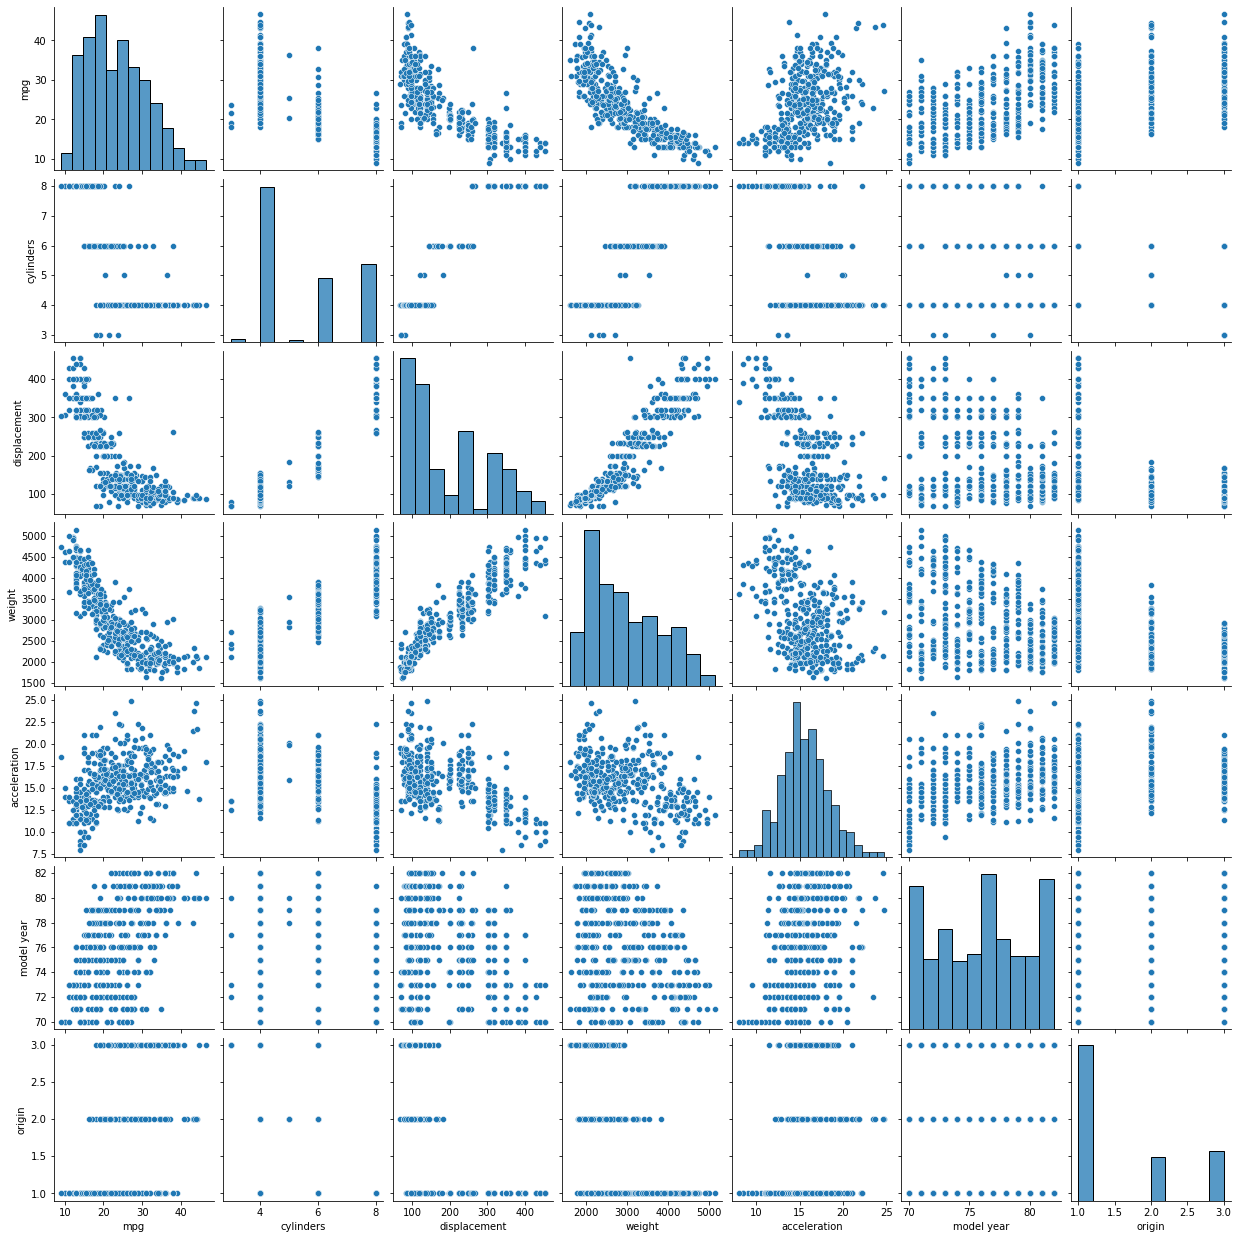

In [3]:
#산점도 그리기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

sns.pairplot(df)

In [4]:
#전체 열 들의 상관계수 확인
print(df.corr())

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


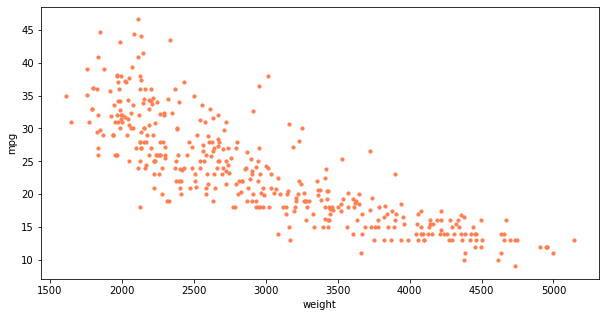

In [5]:
#mpg 와 wwight 그리고 horsepower 와의 상관계수
#weight 와 mpg 컬럼의 산점도 그리기
df.plot(kind='scatter', x='weight',y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

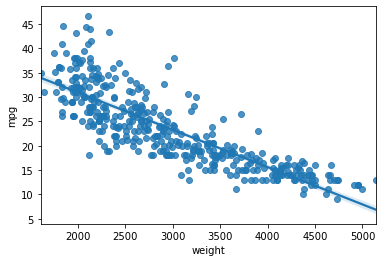

In [6]:
#seaborn 패키지의 regplot()을 이용한 산점도 그리기 
#fit_reg=False 옵션을 이용해서 회귀선을 제거할 수 있음
sns.regplot(x='weight', y='mpg', data=df)

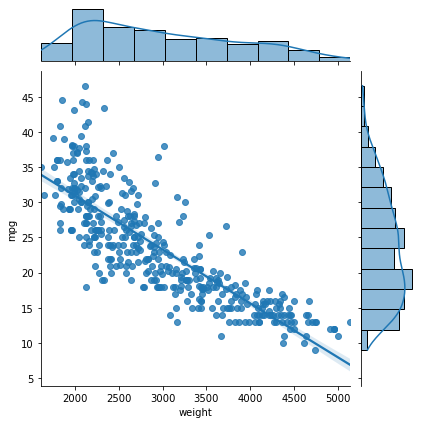

In [7]:
sns.jointplot(x='weight', y='mpg', kind='reg', data=df)

In [8]:
#mpg 와 weight 그리고 horsepower 와의 상관계수

print('mpg와 weight의 상관계수:', df['mpg'].corr(df['weight']))

#print(df['mpg'].corr(df['horsepower'])) #horsepower는 숫자 컬럼이 아니라서 안됨
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print('mpg와 horsepower의 상관계수:', df['mpg'].corr(df['horsepower']))

mpg와 weight의 상관계수: -0.8317409332443351
mpg와 horsepower의 상관계수: -0.7784267838977759


In [9]:
import scipy as sp
result = sp.stats.pearsonr(df['mpg'].values, df['horsepower'].values)
print(result)

(-0.7784267838977761, 7.031989029404151e-81)


In [10]:
#데이터 가져오기
sp500_sym = pd.read_csv("./data/sp500_sectors.csv")
sp500_px = pd.read_csv("./data/sp500_data.csv.gz", index_col=0)

#통신사 데이터만 가져오기
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

#특정 기간의 데이터만 추출
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [11]:
#(sector == 'etf').
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD  ...       XTL  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998  ...  0.019076   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  ...  0.000000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991  ...  0.019072   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  ... -0.429213   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  ...  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.009529  0.313499  0.018999  0.075668  
2012-07-03  0.000000  0.129087  0.104492  0.236462  
2012-07-05 -0.142955 -0.073766 -0.142490  0.066211  
2012-07-06 -0.095304  0.119865  0.066495 -0.227003  
2012-07-09  0.352630 -0.064548  0.018999  0.009457  

[5 rows x 17 columns]


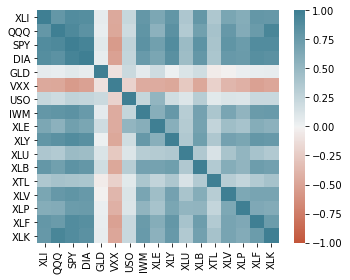

In [12]:
#heatmap을 이용한 수익 간의 상관관계 파악
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

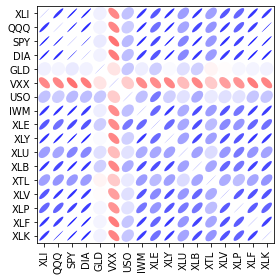

In [13]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

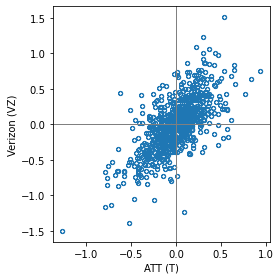

In [14]:
#ATT와 Verizon 과의 상관관계
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

### 엔스콤 데이터

    x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89


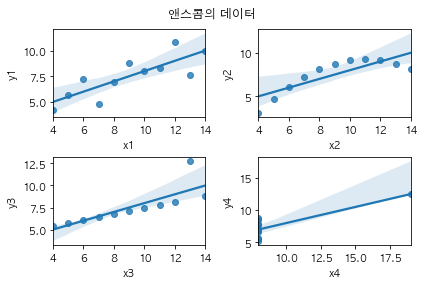

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import matplotlib
import seaborn as sns

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

data = sm.datasets.get_rdataset("anscombe")
df = data.data
print(df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]])

plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("앤스콤의 데이터")
plt.show()

In [16]:
#스피어만 상관계수
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([1,4,9,16,25])
print("피어슨 상관계수:",s1.corr(s2)) 
print("스피어만 상관계수:", s1.corr(s2, method='spearman')) 
print("스피어만 상관계수:", sp.stats.spearmanr(s1, s2)) 

피어슨 상관계수: 0.981104910251593
스피어만 상관계수: 0.9999999999999999
스피어만 상관계수: SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)


In [17]:
## 켄달의 상관계수 
#스피어만 상관계수
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([1,4,9,16,25])
print("켄달 상관계수:", s1.corr(s2, method='kendall')) 
print("켄달 상관계수:", sp.stats.kendalltau(s1, s2)) 

켄달 상관계수: 0.9999999999999999
켄달 상관계수: KendalltauResult(correlation=0.9999999999999999, pvalue=0.016666666666666666)


## 2개 이상의 변수 탐색

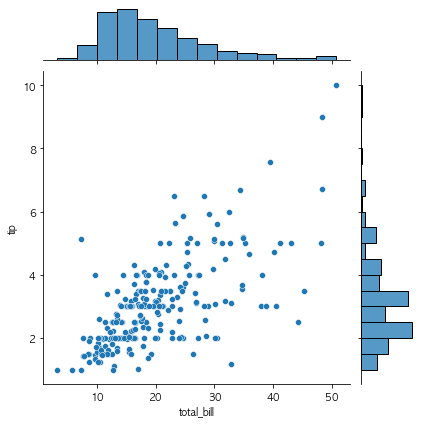

In [19]:
#산점도 그림
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

tips = sns.load_dataset("tips")    # 팁 데이터
sns.jointplot(x="total_bill", y="tip", data=tips, kind='scatter')

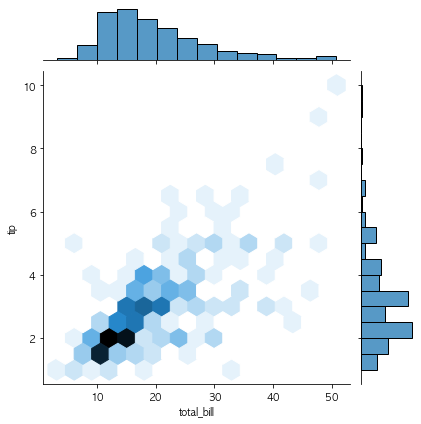

In [20]:
#육각형 그래프
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

In [21]:
kc_tax = pd.read_csv("./data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


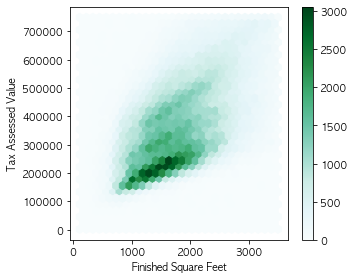

In [22]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

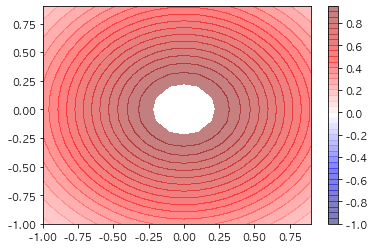

In [23]:
x=np.arange(-1,1,0.1)
y=np.arange(-1,1,0.1)

X,Y=np.meshgrid(x,y)
Z=np.exp(-(X**2+Y**2))

CS=plt.contourf(X,Y,Z,levels=np.arange(-1,1,0.05),alpha=0.5,cmap='seismic')

plt.colorbar()

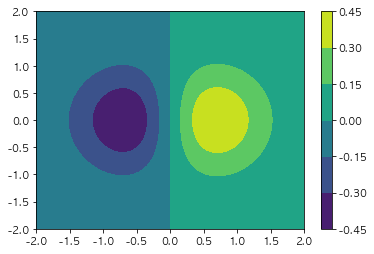

In [24]:
from matplotlib.pyplot import cm
import numpy as np
import matplotlib.pyplot as plt

# Vector Field
Y, X = np.mgrid[-2:2:20j, -2:2:20j]
U =(1 - 2*(X**2))*np.exp(-((X**2)+(Y**2)))

# Countour Plot
X, Y = np.mgrid[-2:2:100j, -2:2:100j]
Z = X*np.exp(-(X**2 + Y**2))
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

plt.show()

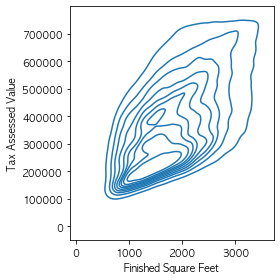

In [32]:
#등고선 차트 - 시간이 오래 걸림
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### 범주형 대 범주형 탐색화 - 크로스 테이블 이용

In [26]:
lc_loans = pd.read_csv('./data/lc_loans.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [27]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


### 범주형 대 수치형 데이터

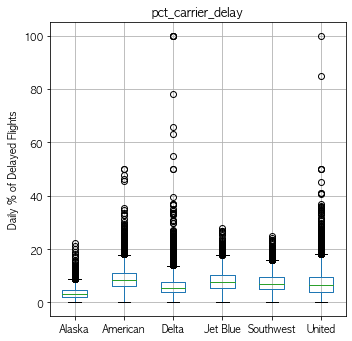

In [28]:
airline_stats = pd.read_csv("./data/airline_stats.csv")
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

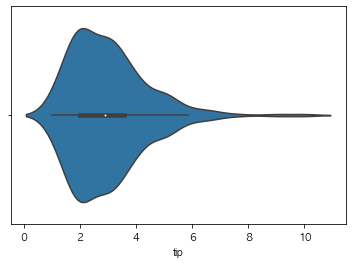

In [29]:
#바이올린 차트
sns.violinplot(tips['tip'])

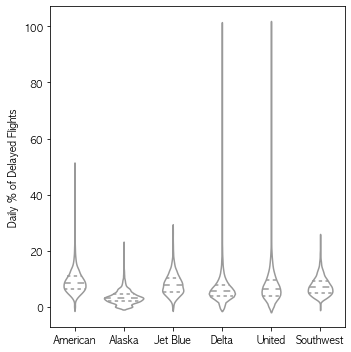

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### 조건화

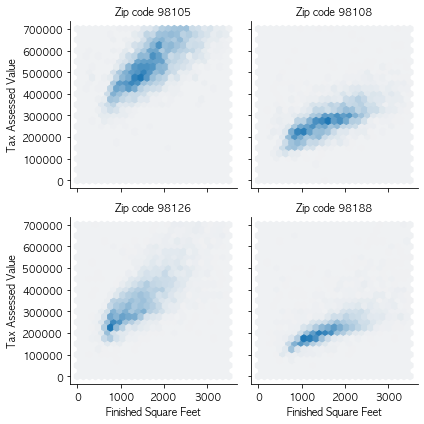

In [31]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()